In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

##Installing Library (Run)

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Tue_Sep_15_19:10:02_PDT_2020
Cuda compilation tools, release 11.1, V11.1.74
Build cuda_11.1.TC455_06.29069683_0
gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!pip list -v | grep [Tt]orch

torch                         1.9.1           /home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages
torchaudio                    0.9.0a0+a85b239 /home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages
torchvision                   0.2.2           /home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages


In [ ]:
!pip list -v | grep [Pp]illow

Pillow                        8.3.1           /home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages conda


In [ ]:
!pip list -v | grep [Mm]mcv

mmcv-full                     1.3.14          /home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages pip


In [ ]:
# pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.9.0/index.html

In [ ]:
!ls

anaconda3  Downloads				 Pictures  Templates
Desktop    GitHubDesktop-linux-2.9.3-linux3.deb  Public    Videos
Documents  Music				 snap


In [ ]:
# # Install mmdetection
# !rm -rf mmdetection
# !git clone https://github.com/open-mmlab/mmdetection.git
# %cd mmdetection

# !pip install -e .

# # install Pillow 7.0.0 back in order to avoid bug in colab
# #!pip install Pillow==7.0.0
# #!pip install Pillow

Obtaining file:///home/ali/Desktop/mmclassification
  Running setup.py develop for mmcls


In [ ]:
# Check Pytorch installation
import torch, torchvision
print('Torch Version: ',torch.__version__)
print('Is Torch CUDA available? ', torch.cuda.is_available())

# Check MMDetection installation
import mmcls
print('MMClassification Version: ', mmcls.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('CUDA Compiler Version: ', get_compiling_cuda_version())
print('GCC Version: ',get_compiler_version())

Torch Version:  1.9.1
Is Torch CUDA available?  True
MMClassification Version:  0.16.0
CUDA Compiler Version:  11.1
GCC Version:  GCC 9.3


##Optional Apex (run)

In [ ]:
# !pip install apex

In [ ]:
# git clone https://github.com/NVIDIA/apex
# cd apex
# pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

This is original paper implementation, experimental on windows. It is laying on MMDet tool, the issues are cuda version and pytorch,torchvision libraries dependencies. It is not recommended to use original code because it does not comply MMDet standarization proceduers.

##MMDetection GITHUB (run)

In [ ]:
# cd '/home/ali/Desktop/mmdetection/mmdetection'

In [ ]:
cd '/home/ali/Desktop/mmclassification'

/home/ali/Desktop/mmclassification


In [ ]:
!ls

anaconda3  Downloads				 Pictures  Templates
Desktop    GitHubDesktop-linux-2.9.3-linux3.deb  Public    Videos
Documents  Music				 snap


In [ ]:
#!mkdir checkpoints

In [ ]:
from mmcls.apis import inference_model, init_model, show_result_pyplot


# config = 'configs/resnet/resnet50_b32x8_TBX11K.py'
#config = 'configs/resnet/resnet50_b32x8_TBX11K_C1.py'
config = 'configs/swin_transformer/swin_tiny_224_b16x64_300e_TBX11K.py'

# initialize the detector
model = init_model(config, device='cuda:0')

In [ ]:
model

##Prepare TBX11K Dataset (run)

In [ ]:
# mkdir data

In [ ]:
# !unzip -q ../drive/MyDrive/TBX11K/TBX11K.zip -d data/
# !unzip -q /media/ali/NCAI-MIDL-TB/Datasets/TBX11K.zip -d data/


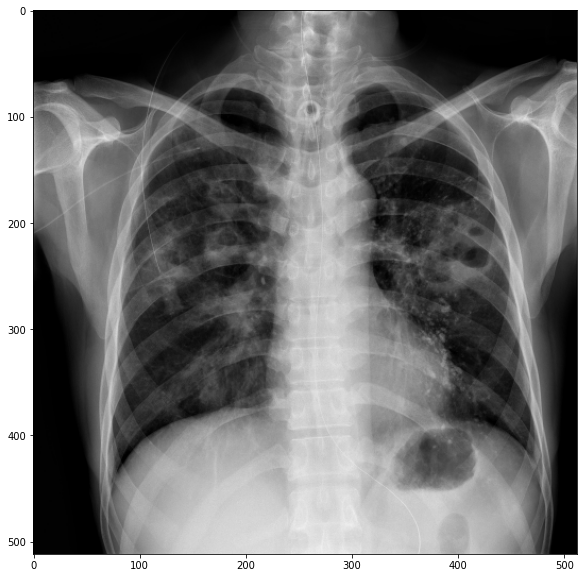

In [ ]:
# Let's take a look at the dataset image
%matplotlib inline
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('../mmdetection/data/TBX11K/imgs/tb/tb0006.png')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### CFG CocoDataset format (run) How to use exisitng COCO format dataset

In [ ]:
from mmcls.apis import set_random_seed
import mmcv


from mmcv import Config
cfg = Config.fromfile(config)
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='ImageClassifier',
    backbone=dict(
        type='SwinTransformer', arch='tiny', img_size=224, drop_path_rate=0.2),
    neck=dict(type='GlobalAveragePooling'),
    head=dict(
        type='MultiLabelLinearClsHead',
        num_classes=3,
        in_channels=768,
        init_cfg=None,
        loss=dict(
            type='LabelSmoothLoss', label_smooth_val=0.1, mode='multi_label')),
    init_cfg=[
        dict(type='TruncNormal', layer='Linear', std=0.02, bias=0.0),
        dict(type='Constant', layer='LayerNorm', val=1.0, bias=0.0)
    ],
    train_cfg=dict(augments=[
        dict(type='BatchMixup', alpha=0.2, num_classes=3, prob=0.5),
        dict(type='BatchCutMix', alpha=1.0, num_classes=3, prob=0.5)
    ]))
rand_increasing_policies = [
    dict(type='AutoContrast'),
    dict(type='Equalize'),
    dict(type='Invert'),
    dict(type='Rotate', magnitude_key='angle', magnitude_range=(0, 30)),
    dict(type='Posterize', magnitude_key='bits', magnitude_ra

In [ ]:
cfg.classes

('health', 'sick', 'tb')

In [ ]:


#number of classes
cfg.model.head.num_classes=3

cfg.data.test.classes = cfg.classes
cfg.data.train.classes = cfg.classes
cfg.data.val.classes = cfg.classes

cfg.data.samples_per_gpu = 96 #32
cfg.data.workers_per_gpu = 1


# Set up working dir to save files and logs.
#cfg.work_dir = './tutorial_exps_C1'
cfg.work_dir = './tutorial_swin_C1'


# cfg.lr_config.step=[330, 420]#swin
# cfg.log_config.interval = 38

#cfg.load_from = 'https://download.openmmlab.com/mmclassification/v0/resnet/resnet50_8xb32_in1k_20210831-ea4938fc.pth'
cfg.load_from = 'https://download.openmmlab.com/mmclassification/v0/swin-transformer/convert/swin_tiny_patch4_window7_224-160bb0a5.pth'


# Change the evaluation metric since we use customized dataset.
cfg.log_config.interval = 94 ####### 8976 images / batchsize

cfg.evaluation.interval = 10
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 10
cfg.checkpoint_config.max_keep_ckpts = 2

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


cfg.runner.max_epochs = 300
cfg.total_epochs = 300

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

#with open('configs/resnet/resnet50_b32x8_TBX11K_fullCFG.py', 'w') as f:
#with open('configs/resnet/resnet50_b32x8_TBX11K_C1_fullCFG.py', 'w') as f:
with open('configs/swin_transformer/swin_tiny_224_b16x64_300e_TBX11K_C1_fullCFG.py', 'w') as f:
    f.write(cfg.pretty_text)


Config:
model = dict(
    type='ImageClassifier',
    backbone=dict(
        type='SwinTransformer', arch='tiny', img_size=224, drop_path_rate=0.2),
    neck=dict(type='GlobalAveragePooling'),
    head=dict(
        type='MultiLabelLinearClsHead',
        num_classes=3,
        in_channels=768,
        init_cfg=None,
        loss=dict(
            type='LabelSmoothLoss', label_smooth_val=0.1, mode='multi_label')),
    init_cfg=[
        dict(type='TruncNormal', layer='Linear', std=0.02, bias=0.0),
        dict(type='Constant', layer='LayerNorm', val=1.0, bias=0.0)
    ],
    train_cfg=dict(augments=[
        dict(type='BatchMixup', alpha=0.2, num_classes=3, prob=0.5),
        dict(type='BatchCutMix', alpha=1.0, num_classes=3, prob=0.5)
    ]))
rand_increasing_policies = [
    dict(type='AutoContrast'),
    dict(type='Equalize'),
    dict(type='Invert'),
    dict(type='Rotate', magnitude_key='angle', magnitude_range=(0, 30)),
    dict(type='Posterize', magnitude_key='bits', magnitude_ra

##Train Detector (run)

In [ ]:
from mmcls.datasets import build_dataset
from mmcls.models import build_classifier
from mmcls.apis import train_model
import os

#tbx11k classes

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
#model = build_detector(
#    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model = build_classifier(cfg.model)
# Add an attribute for visualization convenience
#datasets[0].CLASSES = classes
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))

In [ ]:
train_model(model, datasets, cfg, distributed=False, validate=True)

2021-11-02 13:49:32,489 - mmcls - INFO - load checkpoint from https://download.openmmlab.com/mmclassification/v0/swin-transformer/convert/swin_tiny_patch4_window7_224-160bb0a5.pth
2021-11-02 13:49:32,490 - mmcls - INFO - Use load_from_http loader
2021-11-02 13:49:32,590 - mmcls - WARNING - The model and loaded state dict do not match exactly

size mismatch for head.fc.weight: copying a param with shape torch.Size([1000, 768]) from checkpoint, the shape in current model is torch.Size([3, 768]).
size mismatch for head.fc.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([3]).
2021-11-02 13:49:32,592 - mmcls - INFO - Start running, host: ali@ali-desktop, work_dir: /home/ali/Desktop/mmclassification/tutorial_swin_C1
2021-11-02 13:49:32,593 - mmcls - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) CosineAnnealingLrUpdaterHook       
(NORMAL      ) CheckpointHook                     
(LOW         ) E

[                                                  ] 0/2088, elapsed: 0s, ETA:

/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 88.3 task/s, elapsed: 24s, ETA:     0s

2021-11-02 14:10:52,496 - mmcls - INFO - Epoch(val) [10][22]	accuracy_top-1: 94.5402, accuracy_top-5: 100.0000
2021-11-02 14:12:53,491 - mmcls - INFO - Epoch [11][94/94]	lr: 9.967e-05, eta: 10:02:48, time: 1.287, data_time: 0.348, memory: 11111, loss: 1.5198
2021-11-02 14:14:54,201 - mmcls - INFO - Epoch [12][94/94]	lr: 9.961e-05, eta: 9:58:57, time: 1.284, data_time: 0.345, memory: 11111, loss: 1.5118
2021-11-02 14:16:55,271 - mmcls - INFO - Epoch [13][94/94]	lr: 9.954e-05, eta: 9:55:30, time: 1.288, data_time: 0.354, memory: 11111, loss: 1.5263
2021-11-02 14:18:57,504 - mmcls - INFO - Epoch [14][94/94]	lr: 9.947e-05, eta: 9:52:39, time: 1.300, data_time: 0.364, memory: 11111, loss: 1.5086
2021-11-02 14:21:15,638 - mmcls - INFO - Epoch [15][94/94]	lr: 9.939e-05, eta: 9:54:57, time: 1.469, data_time: 0.536, memory: 11111, loss: 1.4936
2021-11-02 14:23:13,037 - mmcls - INFO - Epoch [16][94/94]	lr: 9.931e-05, eta: 9:50:32, time: 1.249, data_time: 0.311, memory: 11111, loss: 1.4572
2021-1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.5 task/s, elapsed: 23s, ETA:     0s

2021-11-02 14:31:25,841 - mmcls - INFO - Epoch(val) [20][22]	accuracy_top-1: 96.8391, accuracy_top-5: 100.0000
2021-11-02 14:33:22,817 - mmcls - INFO - Epoch [21][94/94]	lr: 9.881e-05, eta: 9:31:51, time: 1.244, data_time: 0.311, memory: 11111, loss: 1.4501
2021-11-02 14:35:19,989 - mmcls - INFO - Epoch [22][94/94]	lr: 9.869e-05, eta: 9:28:35, time: 1.246, data_time: 0.310, memory: 11111, loss: 1.4725
2021-11-02 14:37:17,470 - mmcls - INFO - Epoch [23][94/94]	lr: 9.857e-05, eta: 9:25:29, time: 1.250, data_time: 0.313, memory: 11111, loss: 1.4567
2021-11-02 14:39:14,689 - mmcls - INFO - Epoch [24][94/94]	lr: 9.845e-05, eta: 9:22:26, time: 1.247, data_time: 0.317, memory: 11111, loss: 1.4295
2021-11-02 14:41:12,029 - mmcls - INFO - Epoch [25][94/94]	lr: 9.831e-05, eta: 9:19:29, time: 1.248, data_time: 0.316, memory: 11111, loss: 1.4856
2021-11-02 14:43:08,988 - mmcls - INFO - Epoch [26][94/94]	lr: 9.818e-05, eta: 9:16:33, time: 1.244, data_time: 0.312, memory: 11111, loss: 1.4442
2021-11

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.1 task/s, elapsed: 23s, ETA:     0s

2021-11-02 14:51:21,406 - mmcls - INFO - Epoch(val) [30][22]	accuracy_top-1: 97.3180, accuracy_top-5: 100.0000
2021-11-02 14:53:19,045 - mmcls - INFO - Epoch [31][94/94]	lr: 9.742e-05, eta: 9:03:08, time: 1.251, data_time: 0.323, memory: 11111, loss: 1.4456
2021-11-02 14:55:16,258 - mmcls - INFO - Epoch [32][94/94]	lr: 9.725e-05, eta: 9:00:34, time: 1.247, data_time: 0.317, memory: 11111, loss: 1.4448
2021-11-02 14:57:13,506 - mmcls - INFO - Epoch [33][94/94]	lr: 9.708e-05, eta: 8:58:02, time: 1.247, data_time: 0.322, memory: 11111, loss: 1.4525
2021-11-02 14:59:10,605 - mmcls - INFO - Epoch [34][94/94]	lr: 9.690e-05, eta: 8:55:32, time: 1.246, data_time: 0.318, memory: 11111, loss: 1.4523
2021-11-02 15:01:07,451 - mmcls - INFO - Epoch [35][94/94]	lr: 9.671e-05, eta: 8:53:01, time: 1.243, data_time: 0.315, memory: 11111, loss: 1.4321
2021-11-02 15:03:05,034 - mmcls - INFO - Epoch [36][94/94]	lr: 9.653e-05, eta: 8:50:37, time: 1.251, data_time: 0.327, memory: 11111, loss: 1.4388
2021-11

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.2 task/s, elapsed: 23s, ETA:     0s

2021-11-02 15:11:17,436 - mmcls - INFO - Epoch(val) [40][22]	accuracy_top-1: 96.9828, accuracy_top-5: 100.0000
2021-11-02 15:13:14,787 - mmcls - INFO - Epoch [41][94/94]	lr: 9.551e-05, eta: 8:38:51, time: 1.248, data_time: 0.317, memory: 11111, loss: 1.4327
2021-11-02 15:15:11,934 - mmcls - INFO - Epoch [42][94/94]	lr: 9.529e-05, eta: 8:36:32, time: 1.246, data_time: 0.315, memory: 11111, loss: 1.4215
2021-11-02 15:17:09,083 - mmcls - INFO - Epoch [43][94/94]	lr: 9.507e-05, eta: 8:34:14, time: 1.246, data_time: 0.317, memory: 11111, loss: 1.4384
2021-11-02 15:19:06,074 - mmcls - INFO - Epoch [44][94/94]	lr: 9.484e-05, eta: 8:31:56, time: 1.245, data_time: 0.313, memory: 11111, loss: 1.4348
2021-11-02 15:21:03,750 - mmcls - INFO - Epoch [45][94/94]	lr: 9.461e-05, eta: 8:29:43, time: 1.252, data_time: 0.319, memory: 11111, loss: 1.4382
2021-11-02 15:23:01,111 - mmcls - INFO - Epoch [46][94/94]	lr: 9.437e-05, eta: 8:27:28, time: 1.248, data_time: 0.321, memory: 11111, loss: 1.4383
2021-11

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.2 task/s, elapsed: 23s, ETA:     0s

2021-11-02 15:31:14,385 - mmcls - INFO - Epoch(val) [50][22]	accuracy_top-1: 97.2222, accuracy_top-5: 100.0000
2021-11-02 15:33:11,512 - mmcls - INFO - Epoch [51][94/94]	lr: 9.311e-05, eta: 8:16:29, time: 1.246, data_time: 0.317, memory: 11111, loss: 1.4152
2021-11-02 15:35:08,793 - mmcls - INFO - Epoch [52][94/94]	lr: 9.284e-05, eta: 8:14:19, time: 1.248, data_time: 0.314, memory: 11111, loss: 1.3901
2021-11-02 15:37:05,874 - mmcls - INFO - Epoch [53][94/94]	lr: 9.257e-05, eta: 8:12:07, time: 1.245, data_time: 0.310, memory: 11111, loss: 1.4292
2021-11-02 15:39:03,267 - mmcls - INFO - Epoch [54][94/94]	lr: 9.230e-05, eta: 8:09:58, time: 1.249, data_time: 0.317, memory: 11111, loss: 1.4162
2021-11-02 15:41:00,274 - mmcls - INFO - Epoch [55][94/94]	lr: 9.202e-05, eta: 8:07:47, time: 1.245, data_time: 0.310, memory: 11111, loss: 1.3861
2021-11-02 15:42:57,381 - mmcls - INFO - Epoch [56][94/94]	lr: 9.173e-05, eta: 8:05:37, time: 1.246, data_time: 0.310, memory: 11111, loss: 1.4078
2021-11

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.4 task/s, elapsed: 23s, ETA:     0s

2021-11-02 15:51:09,579 - mmcls - INFO - Epoch(val) [60][22]	accuracy_top-1: 98.5632, accuracy_top-5: 100.0000
2021-11-02 15:53:06,701 - mmcls - INFO - Epoch [61][94/94]	lr: 9.024e-05, eta: 7:54:57, time: 1.246, data_time: 0.313, memory: 11111, loss: 1.4134
2021-11-02 15:55:03,776 - mmcls - INFO - Epoch [62][94/94]	lr: 8.993e-05, eta: 7:52:49, time: 1.245, data_time: 0.309, memory: 11111, loss: 1.4011
2021-11-02 15:57:00,785 - mmcls - INFO - Epoch [63][94/94]	lr: 8.962e-05, eta: 7:50:42, time: 1.245, data_time: 0.314, memory: 11111, loss: 1.3728
2021-11-02 15:58:57,913 - mmcls - INFO - Epoch [64][94/94]	lr: 8.930e-05, eta: 7:48:35, time: 1.246, data_time: 0.312, memory: 11111, loss: 1.4132
2021-11-02 16:00:54,908 - mmcls - INFO - Epoch [65][94/94]	lr: 8.897e-05, eta: 7:46:28, time: 1.245, data_time: 0.310, memory: 11111, loss: 1.3979
2021-11-02 16:02:51,797 - mmcls - INFO - Epoch [66][94/94]	lr: 8.864e-05, eta: 7:44:21, time: 1.243, data_time: 0.311, memory: 11111, loss: 1.4119
2021-11

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.2 task/s, elapsed: 23s, ETA:     0s

2021-11-02 16:11:03,944 - mmcls - INFO - Epoch(val) [70][22]	accuracy_top-1: 98.5632, accuracy_top-5: 100.0000
2021-11-02 16:13:01,505 - mmcls - INFO - Epoch [71][94/94]	lr: 8.694e-05, eta: 7:33:57, time: 1.251, data_time: 0.314, memory: 11111, loss: 1.4140
2021-11-02 16:14:58,825 - mmcls - INFO - Epoch [72][94/94]	lr: 8.659e-05, eta: 7:31:53, time: 1.248, data_time: 0.308, memory: 11111, loss: 1.4139
2021-11-02 16:16:55,422 - mmcls - INFO - Epoch [73][94/94]	lr: 8.623e-05, eta: 7:29:47, time: 1.240, data_time: 0.303, memory: 11111, loss: 1.4039
2021-11-02 16:18:52,756 - mmcls - INFO - Epoch [74][94/94]	lr: 8.587e-05, eta: 7:27:43, time: 1.248, data_time: 0.318, memory: 11111, loss: 1.3681
2021-11-02 16:20:50,116 - mmcls - INFO - Epoch [75][94/94]	lr: 8.551e-05, eta: 7:25:40, time: 1.248, data_time: 0.317, memory: 11111, loss: 1.4096
2021-11-02 16:22:47,539 - mmcls - INFO - Epoch [76][94/94]	lr: 8.514e-05, eta: 7:23:37, time: 1.249, data_time: 0.313, memory: 11111, loss: 1.3872
2021-11

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.8 task/s, elapsed: 23s, ETA:     0s

2021-11-02 16:31:03,057 - mmcls - INFO - Epoch(val) [80][22]	accuracy_top-1: 98.4674, accuracy_top-5: 100.0000
2021-11-02 16:32:59,835 - mmcls - INFO - Epoch [81][94/94]	lr: 8.324e-05, eta: 7:13:29, time: 1.242, data_time: 0.306, memory: 11111, loss: 1.4098
2021-11-02 16:34:56,764 - mmcls - INFO - Epoch [82][94/94]	lr: 8.285e-05, eta: 7:11:25, time: 1.244, data_time: 0.309, memory: 11111, loss: 1.3840
2021-11-02 16:36:53,865 - mmcls - INFO - Epoch [83][94/94]	lr: 8.245e-05, eta: 7:09:22, time: 1.246, data_time: 0.312, memory: 11111, loss: 1.3897
2021-11-02 16:38:51,316 - mmcls - INFO - Epoch [84][94/94]	lr: 8.206e-05, eta: 7:07:20, time: 1.249, data_time: 0.319, memory: 11111, loss: 1.3766
2021-11-02 16:40:48,411 - mmcls - INFO - Epoch [85][94/94]	lr: 8.166e-05, eta: 7:05:17, time: 1.246, data_time: 0.314, memory: 11111, loss: 1.3732
2021-11-02 16:42:45,799 - mmcls - INFO - Epoch [86][94/94]	lr: 8.125e-05, eta: 7:03:15, time: 1.249, data_time: 0.316, memory: 11111, loss: 1.3911
2021-11

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.3 task/s, elapsed: 23s, ETA:     0s

2021-11-02 16:50:57,375 - mmcls - INFO - Epoch(val) [90][22]	accuracy_top-1: 98.6111, accuracy_top-5: 100.0000
2021-11-02 16:52:54,673 - mmcls - INFO - Epoch [91][94/94]	lr: 7.918e-05, eta: 6:53:04, time: 1.248, data_time: 0.315, memory: 11111, loss: 1.3682
2021-11-02 16:54:51,709 - mmcls - INFO - Epoch [92][94/94]	lr: 7.875e-05, eta: 6:51:02, time: 1.245, data_time: 0.308, memory: 11111, loss: 1.3858
2021-11-02 16:56:57,154 - mmcls - INFO - Epoch [93][94/94]	lr: 7.833e-05, eta: 6:49:19, time: 1.334, data_time: 0.406, memory: 11111, loss: 1.3813
2021-11-02 16:58:54,140 - mmcls - INFO - Epoch [94][94/94]	lr: 7.790e-05, eta: 6:47:17, time: 1.244, data_time: 0.309, memory: 11111, loss: 1.3813
2021-11-02 17:00:51,492 - mmcls - INFO - Epoch [95][94/94]	lr: 7.746e-05, eta: 6:45:15, time: 1.248, data_time: 0.314, memory: 11111, loss: 1.3890
2021-11-02 17:02:48,727 - mmcls - INFO - Epoch [96][94/94]	lr: 7.703e-05, eta: 6:43:14, time: 1.247, data_time: 0.312, memory: 11111, loss: 1.3612
2021-11

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.5 task/s, elapsed: 23s, ETA:     0s

2021-11-02 17:11:01,177 - mmcls - INFO - Epoch(val) [100][22]	accuracy_top-1: 98.8506, accuracy_top-5: 100.0000
2021-11-02 17:12:59,009 - mmcls - INFO - Epoch [101][94/94]	lr: 7.480e-05, eta: 6:33:09, time: 1.253, data_time: 0.328, memory: 11111, loss: 1.3600
2021-11-02 17:14:56,075 - mmcls - INFO - Epoch [102][94/94]	lr: 7.435e-05, eta: 6:31:07, time: 1.245, data_time: 0.316, memory: 11111, loss: 1.3623
2021-11-02 17:16:53,357 - mmcls - INFO - Epoch [103][94/94]	lr: 7.390e-05, eta: 6:29:06, time: 1.248, data_time: 0.312, memory: 11111, loss: 1.3827
2021-11-02 17:18:50,182 - mmcls - INFO - Epoch [104][94/94]	lr: 7.344e-05, eta: 6:27:05, time: 1.243, data_time: 0.314, memory: 11111, loss: 1.3594
2021-11-02 17:20:47,951 - mmcls - INFO - Epoch [105][94/94]	lr: 7.298e-05, eta: 6:25:05, time: 1.253, data_time: 0.319, memory: 11111, loss: 1.3457
2021-11-02 17:22:45,192 - mmcls - INFO - Epoch [106][94/94]	lr: 7.251e-05, eta: 6:23:04, time: 1.247, data_time: 0.316, memory: 11111, loss: 1.3756


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.1 task/s, elapsed: 23s, ETA:     0s

2021-11-02 17:30:56,924 - mmcls - INFO - Epoch(val) [110][22]	accuracy_top-1: 98.6111, accuracy_top-5: 100.0000
2021-11-02 17:32:53,783 - mmcls - INFO - Epoch [111][94/94]	lr: 7.016e-05, eta: 6:13:00, time: 1.243, data_time: 0.308, memory: 11111, loss: 1.3537
2021-11-02 17:34:50,725 - mmcls - INFO - Epoch [112][94/94]	lr: 6.969e-05, eta: 6:10:59, time: 1.244, data_time: 0.306, memory: 11111, loss: 1.3702
2021-11-02 17:36:48,113 - mmcls - INFO - Epoch [113][94/94]	lr: 6.921e-05, eta: 6:08:59, time: 1.249, data_time: 0.314, memory: 11111, loss: 1.3530
2021-11-02 17:38:45,250 - mmcls - INFO - Epoch [114][94/94]	lr: 6.873e-05, eta: 6:06:58, time: 1.246, data_time: 0.315, memory: 11111, loss: 1.3762
2021-11-02 17:40:42,319 - mmcls - INFO - Epoch [115][94/94]	lr: 6.824e-05, eta: 6:04:58, time: 1.245, data_time: 0.312, memory: 11111, loss: 1.3787
2021-11-02 17:42:39,827 - mmcls - INFO - Epoch [116][94/94]	lr: 6.776e-05, eta: 6:02:58, time: 1.250, data_time: 0.313, memory: 11111, loss: 1.3537


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.0 task/s, elapsed: 23s, ETA:     0s

2021-11-02 17:50:51,573 - mmcls - INFO - Epoch(val) [120][22]	accuracy_top-1: 98.8985, accuracy_top-5: 100.0000
2021-11-02 17:52:48,970 - mmcls - INFO - Epoch [121][94/94]	lr: 6.531e-05, eta: 5:52:57, time: 1.249, data_time: 0.309, memory: 11111, loss: 1.3658
2021-11-02 17:54:46,042 - mmcls - INFO - Epoch [122][94/94]	lr: 6.481e-05, eta: 5:50:57, time: 1.245, data_time: 0.319, memory: 11111, loss: 1.3560
2021-11-02 17:56:43,061 - mmcls - INFO - Epoch [123][94/94]	lr: 6.432e-05, eta: 5:48:57, time: 1.245, data_time: 0.321, memory: 11111, loss: 1.3564
2021-11-02 17:58:40,083 - mmcls - INFO - Epoch [124][94/94]	lr: 6.382e-05, eta: 5:46:57, time: 1.245, data_time: 0.315, memory: 11111, loss: 1.3398
2021-11-02 18:00:37,377 - mmcls - INFO - Epoch [125][94/94]	lr: 6.332e-05, eta: 5:44:57, time: 1.248, data_time: 0.317, memory: 11111, loss: 1.3728
2021-11-02 18:02:34,454 - mmcls - INFO - Epoch [126][94/94]	lr: 6.282e-05, eta: 5:42:57, time: 1.245, data_time: 0.315, memory: 11111, loss: 1.3470


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.8 task/s, elapsed: 23s, ETA:     0s

2021-11-02 18:10:46,696 - mmcls - INFO - Epoch(val) [130][22]	accuracy_top-1: 98.9464, accuracy_top-5: 100.0000
2021-11-02 18:12:44,286 - mmcls - INFO - Epoch [131][94/94]	lr: 6.029e-05, eta: 5:33:00, time: 1.251, data_time: 0.314, memory: 11111, loss: 1.3572
2021-11-02 18:14:41,621 - mmcls - INFO - Epoch [132][94/94]	lr: 5.978e-05, eta: 5:31:01, time: 1.248, data_time: 0.310, memory: 11111, loss: 1.3368
2021-11-02 18:16:38,736 - mmcls - INFO - Epoch [133][94/94]	lr: 5.927e-05, eta: 5:29:01, time: 1.246, data_time: 0.317, memory: 11111, loss: 1.3540
2021-11-02 18:18:35,578 - mmcls - INFO - Epoch [134][94/94]	lr: 5.876e-05, eta: 5:27:01, time: 1.243, data_time: 0.318, memory: 11111, loss: 1.3248
2021-11-02 18:20:33,310 - mmcls - INFO - Epoch [135][94/94]	lr: 5.825e-05, eta: 5:25:02, time: 1.252, data_time: 0.322, memory: 11111, loss: 1.3287
2021-11-02 18:22:30,436 - mmcls - INFO - Epoch [136][94/94]	lr: 5.774e-05, eta: 5:23:03, time: 1.246, data_time: 0.315, memory: 11111, loss: 1.3475


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 84.9 task/s, elapsed: 25s, ETA:     0s

2021-11-02 18:30:56,003 - mmcls - INFO - Epoch(val) [140][22]	accuracy_top-1: 99.1858, accuracy_top-5: 100.0000
2021-11-02 18:33:00,703 - mmcls - INFO - Epoch [141][94/94]	lr: 5.516e-05, eta: 5:13:28, time: 1.327, data_time: 0.389, memory: 11111, loss: 1.3308
2021-11-02 18:35:05,117 - mmcls - INFO - Epoch [142][94/94]	lr: 5.465e-05, eta: 5:11:36, time: 1.323, data_time: 0.383, memory: 11111, loss: 1.3568
2021-11-02 18:37:09,997 - mmcls - INFO - Epoch [143][94/94]	lr: 5.413e-05, eta: 5:09:45, time: 1.328, data_time: 0.392, memory: 11111, loss: 1.3442
2021-11-02 18:39:15,262 - mmcls - INFO - Epoch [144][94/94]	lr: 5.361e-05, eta: 5:07:54, time: 1.333, data_time: 0.399, memory: 11111, loss: 1.3549
2021-11-02 18:41:21,313 - mmcls - INFO - Epoch [145][94/94]	lr: 5.310e-05, eta: 5:06:04, time: 1.341, data_time: 0.406, memory: 11111, loss: 1.3326
2021-11-02 18:43:18,569 - mmcls - INFO - Epoch [146][94/94]	lr: 5.258e-05, eta: 5:04:04, time: 1.247, data_time: 0.311, memory: 11111, loss: 1.3198


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.1 task/s, elapsed: 23s, ETA:     0s

2021-11-02 18:51:31,723 - mmcls - INFO - Epoch(val) [150][22]	accuracy_top-1: 99.2337, accuracy_top-5: 100.0000
2021-11-02 18:53:29,064 - mmcls - INFO - Epoch [151][94/94]	lr: 4.999e-05, eta: 4:54:07, time: 1.248, data_time: 0.318, memory: 11111, loss: 1.3506
2021-11-02 18:55:26,427 - mmcls - INFO - Epoch [152][94/94]	lr: 4.947e-05, eta: 4:52:07, time: 1.248, data_time: 0.314, memory: 11111, loss: 1.3652
2021-11-02 18:57:23,597 - mmcls - INFO - Epoch [153][94/94]	lr: 4.895e-05, eta: 4:50:07, time: 1.246, data_time: 0.312, memory: 11111, loss: 1.3330
2021-11-02 18:59:20,911 - mmcls - INFO - Epoch [154][94/94]	lr: 4.843e-05, eta: 4:48:08, time: 1.248, data_time: 0.317, memory: 11111, loss: 1.3342
2021-11-02 19:01:18,504 - mmcls - INFO - Epoch [155][94/94]	lr: 4.791e-05, eta: 4:46:09, time: 1.251, data_time: 0.322, memory: 11111, loss: 1.3323
2021-11-02 19:03:15,619 - mmcls - INFO - Epoch [156][94/94]	lr: 4.740e-05, eta: 4:44:09, time: 1.246, data_time: 0.315, memory: 11111, loss: 1.3512


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.5 task/s, elapsed: 23s, ETA:     0s

2021-11-02 19:11:27,932 - mmcls - INFO - Epoch(val) [160][22]	accuracy_top-1: 99.3295, accuracy_top-5: 100.0000
2021-11-02 19:13:25,081 - mmcls - INFO - Epoch [161][94/94]	lr: 4.482e-05, eta: 4:34:12, time: 1.246, data_time: 0.310, memory: 11111, loss: 1.3222
2021-11-02 19:15:22,013 - mmcls - INFO - Epoch [162][94/94]	lr: 4.430e-05, eta: 4:32:12, time: 1.244, data_time: 0.309, memory: 11111, loss: 1.3432
2021-11-02 19:17:19,680 - mmcls - INFO - Epoch [163][94/94]	lr: 4.379e-05, eta: 4:30:14, time: 1.252, data_time: 0.321, memory: 11111, loss: 1.3207
2021-11-02 19:19:17,378 - mmcls - INFO - Epoch [164][94/94]	lr: 4.327e-05, eta: 4:28:15, time: 1.252, data_time: 0.322, memory: 11111, loss: 1.3583
2021-11-02 19:21:14,997 - mmcls - INFO - Epoch [165][94/94]	lr: 4.276e-05, eta: 4:26:16, time: 1.251, data_time: 0.327, memory: 11111, loss: 1.3456
2021-11-02 19:23:12,049 - mmcls - INFO - Epoch [166][94/94]	lr: 4.225e-05, eta: 4:24:16, time: 1.245, data_time: 0.313, memory: 11111, loss: 1.3210


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.2 task/s, elapsed: 23s, ETA:     0s

2021-11-02 19:31:22,906 - mmcls - INFO - Epoch(val) [170][22]	accuracy_top-1: 99.3774, accuracy_top-5: 100.0000
2021-11-02 19:33:19,783 - mmcls - INFO - Epoch [171][94/94]	lr: 3.971e-05, eta: 4:14:19, time: 1.243, data_time: 0.311, memory: 11111, loss: 1.3311
2021-11-02 19:35:17,188 - mmcls - INFO - Epoch [172][94/94]	lr: 3.920e-05, eta: 4:12:20, time: 1.249, data_time: 0.317, memory: 11111, loss: 1.3145
2021-11-02 19:37:14,267 - mmcls - INFO - Epoch [173][94/94]	lr: 3.870e-05, eta: 4:10:21, time: 1.245, data_time: 0.314, memory: 11111, loss: 1.3368
2021-11-02 19:39:11,457 - mmcls - INFO - Epoch [174][94/94]	lr: 3.820e-05, eta: 4:08:22, time: 1.247, data_time: 0.314, memory: 11111, loss: 1.3295
2021-11-02 19:41:08,619 - mmcls - INFO - Epoch [175][94/94]	lr: 3.769e-05, eta: 4:06:23, time: 1.246, data_time: 0.313, memory: 11111, loss: 1.3387
2021-11-02 19:43:06,152 - mmcls - INFO - Epoch [176][94/94]	lr: 3.719e-05, eta: 4:04:24, time: 1.250, data_time: 0.320, memory: 11111, loss: 1.3324


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.5 task/s, elapsed: 23s, ETA:     0s

2021-11-02 19:51:17,885 - mmcls - INFO - Epoch(val) [180][22]	accuracy_top-1: 99.4732, accuracy_top-5: 100.0000
2021-11-02 19:53:14,865 - mmcls - INFO - Epoch [181][94/94]	lr: 3.472e-05, eta: 3:54:29, time: 1.244, data_time: 0.320, memory: 11111, loss: 1.3379
2021-11-02 19:55:11,983 - mmcls - INFO - Epoch [182][94/94]	lr: 3.423e-05, eta: 3:52:30, time: 1.246, data_time: 0.320, memory: 11111, loss: 1.3411
2021-11-02 19:57:09,324 - mmcls - INFO - Epoch [183][94/94]	lr: 3.374e-05, eta: 3:50:31, time: 1.248, data_time: 0.323, memory: 11111, loss: 1.3099
2021-11-02 19:59:06,922 - mmcls - INFO - Epoch [184][94/94]	lr: 3.325e-05, eta: 3:48:33, time: 1.251, data_time: 0.319, memory: 11111, loss: 1.3255
2021-11-02 20:01:04,253 - mmcls - INFO - Epoch [185][94/94]	lr: 3.277e-05, eta: 3:46:34, time: 1.248, data_time: 0.315, memory: 11111, loss: 1.3130
2021-11-02 20:03:01,345 - mmcls - INFO - Epoch [186][94/94]	lr: 3.228e-05, eta: 3:44:35, time: 1.246, data_time: 0.315, memory: 11111, loss: 1.2869


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.7 task/s, elapsed: 23s, ETA:     0s

2021-11-02 20:11:13,640 - mmcls - INFO - Epoch(val) [190][22]	accuracy_top-1: 99.4732, accuracy_top-5: 100.0000
2021-11-02 20:13:10,422 - mmcls - INFO - Epoch [191][94/94]	lr: 2.990e-05, eta: 3:34:41, time: 1.242, data_time: 0.310, memory: 11111, loss: 1.3211
2021-11-02 20:15:07,659 - mmcls - INFO - Epoch [192][94/94]	lr: 2.943e-05, eta: 3:32:42, time: 1.247, data_time: 0.312, memory: 11111, loss: 1.3244
2021-11-02 20:17:04,876 - mmcls - INFO - Epoch [193][94/94]	lr: 2.896e-05, eta: 3:30:43, time: 1.247, data_time: 0.320, memory: 11111, loss: 1.3026
2021-11-02 20:19:01,802 - mmcls - INFO - Epoch [194][94/94]	lr: 2.850e-05, eta: 3:28:45, time: 1.244, data_time: 0.315, memory: 11111, loss: 1.3282
2021-11-02 20:20:59,494 - mmcls - INFO - Epoch [195][94/94]	lr: 2.803e-05, eta: 3:26:46, time: 1.252, data_time: 0.322, memory: 11111, loss: 1.2930
2021-11-02 20:22:56,837 - mmcls - INFO - Epoch [196][94/94]	lr: 2.757e-05, eta: 3:24:48, time: 1.248, data_time: 0.316, memory: 11111, loss: 1.2788


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.5 task/s, elapsed: 23s, ETA:     0s

2021-11-02 20:31:08,352 - mmcls - INFO - Epoch(val) [200][22]	accuracy_top-1: 99.4732, accuracy_top-5: 100.0000
2021-11-02 20:33:05,938 - mmcls - INFO - Epoch [201][94/94]	lr: 2.531e-05, eta: 3:14:54, time: 1.251, data_time: 0.317, memory: 11111, loss: 1.2827
2021-11-02 20:35:03,309 - mmcls - INFO - Epoch [202][94/94]	lr: 2.486e-05, eta: 3:12:56, time: 1.249, data_time: 0.316, memory: 11111, loss: 1.3123
2021-11-02 20:37:00,167 - mmcls - INFO - Epoch [203][94/94]	lr: 2.442e-05, eta: 3:10:57, time: 1.243, data_time: 0.310, memory: 11111, loss: 1.2755
2021-11-02 20:38:57,983 - mmcls - INFO - Epoch [204][94/94]	lr: 2.398e-05, eta: 3:08:59, time: 1.253, data_time: 0.322, memory: 11111, loss: 1.3392
2021-11-02 20:40:54,920 - mmcls - INFO - Epoch [205][94/94]	lr: 2.354e-05, eta: 3:07:00, time: 1.244, data_time: 0.311, memory: 11111, loss: 1.3463
2021-11-02 20:42:51,697 - mmcls - INFO - Epoch [206][94/94]	lr: 2.311e-05, eta: 3:05:01, time: 1.242, data_time: 0.309, memory: 11111, loss: 1.3289


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.3 task/s, elapsed: 23s, ETA:     0s

2021-11-02 20:51:03,534 - mmcls - INFO - Epoch(val) [210][22]	accuracy_top-1: 99.5211, accuracy_top-5: 100.0000
2021-11-02 20:53:00,769 - mmcls - INFO - Epoch [211][94/94]	lr: 2.099e-05, eta: 2:55:09, time: 1.247, data_time: 0.318, memory: 11111, loss: 1.3112
2021-11-02 20:54:57,729 - mmcls - INFO - Epoch [212][94/94]	lr: 2.058e-05, eta: 2:53:10, time: 1.244, data_time: 0.310, memory: 11111, loss: 1.2691
2021-11-02 20:56:54,870 - mmcls - INFO - Epoch [213][94/94]	lr: 2.017e-05, eta: 2:51:12, time: 1.246, data_time: 0.315, memory: 11111, loss: 1.3090
2021-11-02 20:58:51,848 - mmcls - INFO - Epoch [214][94/94]	lr: 1.976e-05, eta: 2:49:13, time: 1.244, data_time: 0.315, memory: 11111, loss: 1.2873
2021-11-02 21:00:49,325 - mmcls - INFO - Epoch [215][94/94]	lr: 1.935e-05, eta: 2:47:15, time: 1.250, data_time: 0.316, memory: 11111, loss: 1.3289
2021-11-02 21:02:46,340 - mmcls - INFO - Epoch [216][94/94]	lr: 1.895e-05, eta: 2:45:17, time: 1.245, data_time: 0.316, memory: 11111, loss: 1.3189


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.9 task/s, elapsed: 23s, ETA:     0s

2021-11-02 21:10:58,014 - mmcls - INFO - Epoch(val) [220][22]	accuracy_top-1: 99.6169, accuracy_top-5: 100.0000
2021-11-02 21:12:55,175 - mmcls - INFO - Epoch [221][94/94]	lr: 1.700e-05, eta: 2:35:25, time: 1.246, data_time: 0.318, memory: 11111, loss: 1.3196
2021-11-02 21:14:52,406 - mmcls - INFO - Epoch [222][94/94]	lr: 1.662e-05, eta: 2:33:26, time: 1.247, data_time: 0.310, memory: 11111, loss: 1.3020
2021-11-02 21:16:50,144 - mmcls - INFO - Epoch [223][94/94]	lr: 1.624e-05, eta: 2:31:28, time: 1.252, data_time: 0.322, memory: 11111, loss: 1.2952
2021-11-02 21:18:47,005 - mmcls - INFO - Epoch [224][94/94]	lr: 1.587e-05, eta: 2:29:30, time: 1.243, data_time: 0.312, memory: 11111, loss: 1.2979
2021-11-02 21:20:44,391 - mmcls - INFO - Epoch [225][94/94]	lr: 1.550e-05, eta: 2:27:31, time: 1.249, data_time: 0.313, memory: 11111, loss: 1.3145
2021-11-02 21:22:41,735 - mmcls - INFO - Epoch [226][94/94]	lr: 1.514e-05, eta: 2:25:33, time: 1.248, data_time: 0.321, memory: 11111, loss: 1.3084


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.8 task/s, elapsed: 23s, ETA:     0s

2021-11-02 21:30:53,241 - mmcls - INFO - Epoch(val) [230][22]	accuracy_top-1: 99.6648, accuracy_top-5: 100.0000
2021-11-02 21:32:50,157 - mmcls - INFO - Epoch [231][94/94]	lr: 1.337e-05, eta: 2:15:42, time: 1.244, data_time: 0.315, memory: 11111, loss: 1.3174
2021-11-02 21:34:47,203 - mmcls - INFO - Epoch [232][94/94]	lr: 1.303e-05, eta: 2:13:43, time: 1.245, data_time: 0.317, memory: 11111, loss: 1.3134
2021-11-02 21:36:44,576 - mmcls - INFO - Epoch [233][94/94]	lr: 1.270e-05, eta: 2:11:45, time: 1.249, data_time: 0.321, memory: 11111, loss: 1.2795
2021-11-02 21:38:42,104 - mmcls - INFO - Epoch [234][94/94]	lr: 1.236e-05, eta: 2:09:47, time: 1.250, data_time: 0.321, memory: 11111, loss: 1.2941
2021-11-02 21:40:39,244 - mmcls - INFO - Epoch [235][94/94]	lr: 1.203e-05, eta: 2:07:49, time: 1.246, data_time: 0.317, memory: 11111, loss: 1.3159
2021-11-02 21:42:36,776 - mmcls - INFO - Epoch [236][94/94]	lr: 1.171e-05, eta: 2:05:51, time: 1.250, data_time: 0.322, memory: 11111, loss: 1.2938


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.7 task/s, elapsed: 23s, ETA:     0s

2021-11-02 21:50:49,540 - mmcls - INFO - Epoch(val) [240][22]	accuracy_top-1: 99.5211, accuracy_top-5: 100.0000
2021-11-02 21:52:47,104 - mmcls - INFO - Epoch [241][94/94]	lr: 1.015e-05, eta: 1:56:00, time: 1.251, data_time: 0.320, memory: 11111, loss: 1.2989
2021-11-02 21:54:44,274 - mmcls - INFO - Epoch [242][94/94]	lr: 9.856e-06, eta: 1:54:02, time: 1.246, data_time: 0.313, memory: 11111, loss: 1.2851
2021-11-02 21:56:41,599 - mmcls - INFO - Epoch [243][94/94]	lr: 9.563e-06, eta: 1:52:04, time: 1.248, data_time: 0.314, memory: 11111, loss: 1.2944
2021-11-02 21:58:38,911 - mmcls - INFO - Epoch [244][94/94]	lr: 9.273e-06, eta: 1:50:06, time: 1.248, data_time: 0.317, memory: 11111, loss: 1.3067
2021-11-02 22:00:36,078 - mmcls - INFO - Epoch [245][94/94]	lr: 8.989e-06, eta: 1:48:07, time: 1.246, data_time: 0.315, memory: 11111, loss: 1.2892
2021-11-02 22:02:33,453 - mmcls - INFO - Epoch [246][94/94]	lr: 8.709e-06, eta: 1:46:09, time: 1.249, data_time: 0.319, memory: 11111, loss: 1.3021


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.1 task/s, elapsed: 23s, ETA:     0s

2021-11-02 22:10:45,372 - mmcls - INFO - Epoch(val) [250][22]	accuracy_top-1: 99.6169, accuracy_top-5: 100.0000
2021-11-02 22:12:42,423 - mmcls - INFO - Epoch [251][94/94]	lr: 7.378e-06, eta: 1:36:19, time: 1.245, data_time: 0.315, memory: 11111, loss: 1.3067
2021-11-02 22:14:40,069 - mmcls - INFO - Epoch [252][94/94]	lr: 7.125e-06, eta: 1:34:21, time: 1.251, data_time: 0.320, memory: 11111, loss: 1.3195
2021-11-02 22:16:37,419 - mmcls - INFO - Epoch [253][94/94]	lr: 6.878e-06, eta: 1:32:23, time: 1.248, data_time: 0.318, memory: 11111, loss: 1.2751
2021-11-02 22:18:34,723 - mmcls - INFO - Epoch [254][94/94]	lr: 6.635e-06, eta: 1:30:25, time: 1.248, data_time: 0.319, memory: 11111, loss: 1.3014
2021-11-02 22:20:32,218 - mmcls - INFO - Epoch [255][94/94]	lr: 6.398e-06, eta: 1:28:27, time: 1.250, data_time: 0.324, memory: 11111, loss: 1.2896
2021-11-02 22:22:29,563 - mmcls - INFO - Epoch [256][94/94]	lr: 6.165e-06, eta: 1:26:29, time: 1.248, data_time: 0.323, memory: 11111, loss: 1.2708


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.6 task/s, elapsed: 23s, ETA:     0s

2021-11-02 22:30:41,251 - mmcls - INFO - Epoch(val) [260][22]	accuracy_top-1: 99.7126, accuracy_top-5: 100.0000
2021-11-02 22:32:38,402 - mmcls - INFO - Epoch [261][94/94]	lr: 5.073e-06, eta: 1:16:38, time: 1.246, data_time: 0.314, memory: 11111, loss: 1.2935
2021-11-02 22:34:35,361 - mmcls - INFO - Epoch [262][94/94]	lr: 4.870e-06, eta: 1:14:40, time: 1.244, data_time: 0.312, memory: 11111, loss: 1.2836
2021-11-02 22:36:32,749 - mmcls - INFO - Epoch [263][94/94]	lr: 4.671e-06, eta: 1:12:42, time: 1.249, data_time: 0.323, memory: 11111, loss: 1.2972
2021-11-02 22:38:29,802 - mmcls - INFO - Epoch [264][94/94]	lr: 4.478e-06, eta: 1:10:44, time: 1.245, data_time: 0.315, memory: 11111, loss: 1.2830
2021-11-02 22:40:26,642 - mmcls - INFO - Epoch [265][94/94]	lr: 4.290e-06, eta: 1:08:46, time: 1.243, data_time: 0.311, memory: 11111, loss: 1.2792
2021-11-02 22:42:23,556 - mmcls - INFO - Epoch [266][94/94]	lr: 4.106e-06, eta: 1:06:48, time: 1.244, data_time: 0.316, memory: 11111, loss: 1.2956


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 91.8 task/s, elapsed: 23s, ETA:     0s

2021-11-02 22:50:35,260 - mmcls - INFO - Epoch(val) [270][22]	accuracy_top-1: 99.5211, accuracy_top-5: 100.0000
2021-11-02 22:52:32,479 - mmcls - INFO - Epoch [271][94/94]	lr: 3.267e-06, eta: 0:56:58, time: 1.247, data_time: 0.317, memory: 11111, loss: 1.2879
2021-11-02 22:54:29,581 - mmcls - INFO - Epoch [272][94/94]	lr: 3.114e-06, eta: 0:55:00, time: 1.246, data_time: 0.316, memory: 11111, loss: 1.2873
2021-11-02 22:56:27,141 - mmcls - INFO - Epoch [273][94/94]	lr: 2.967e-06, eta: 0:53:02, time: 1.251, data_time: 0.318, memory: 11111, loss: 1.2760
2021-11-02 22:58:37,588 - mmcls - INFO - Epoch [274][94/94]	lr: 2.825e-06, eta: 0:51:06, time: 1.388, data_time: 0.456, memory: 11111, loss: 1.3093
2021-11-02 23:00:44,497 - mmcls - INFO - Epoch [275][94/94]	lr: 2.688e-06, eta: 0:49:09, time: 1.350, data_time: 0.417, memory: 11111, loss: 1.3225
2021-11-02 23:02:44,995 - mmcls - INFO - Epoch [276][94/94]	lr: 2.557e-06, eta: 0:47:11, time: 1.282, data_time: 0.346, memory: 11111, loss: 1.2946


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.8 task/s, elapsed: 22s, ETA:     0s

2021-11-02 23:11:14,525 - mmcls - INFO - Epoch(val) [280][22]	accuracy_top-1: 99.6169, accuracy_top-5: 100.0000
2021-11-02 23:13:11,148 - mmcls - INFO - Epoch [281][94/94]	lr: 1.978e-06, eta: 0:37:22, time: 1.241, data_time: 0.308, memory: 11111, loss: 1.2802
2021-11-02 23:15:07,417 - mmcls - INFO - Epoch [282][94/94]	lr: 1.878e-06, eta: 0:35:24, time: 1.237, data_time: 0.301, memory: 11111, loss: 1.2980
2021-11-02 23:17:03,981 - mmcls - INFO - Epoch [283][94/94]	lr: 1.783e-06, eta: 0:33:26, time: 1.240, data_time: 0.308, memory: 11111, loss: 1.2906
2021-11-02 23:19:00,447 - mmcls - INFO - Epoch [284][94/94]	lr: 1.694e-06, eta: 0:31:28, time: 1.239, data_time: 0.311, memory: 11111, loss: 1.2768
2021-11-02 23:20:57,015 - mmcls - INFO - Epoch [285][94/94]	lr: 1.610e-06, eta: 0:29:29, time: 1.240, data_time: 0.308, memory: 11111, loss: 1.3122
2021-11-02 23:22:53,438 - mmcls - INFO - Epoch [286][94/94]	lr: 1.532e-06, eta: 0:27:31, time: 1.238, data_time: 0.308, memory: 11111, loss: 1.2782


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.6 task/s, elapsed: 23s, ETA:     0s

2021-11-02 23:31:01,435 - mmcls - INFO - Epoch(val) [290][22]	accuracy_top-1: 99.5211, accuracy_top-5: 100.0000
2021-11-02 23:32:58,261 - mmcls - INFO - Epoch [291][94/94]	lr: 1.220e-06, eta: 0:17:41, time: 1.243, data_time: 0.310, memory: 11111, loss: 1.3116
2021-11-02 23:34:54,868 - mmcls - INFO - Epoch [292][94/94]	lr: 1.174e-06, eta: 0:15:43, time: 1.240, data_time: 0.304, memory: 11111, loss: 1.2608
2021-11-02 23:36:51,478 - mmcls - INFO - Epoch [293][94/94]	lr: 1.133e-06, eta: 0:13:45, time: 1.240, data_time: 0.311, memory: 11111, loss: 1.2789
2021-11-02 23:38:48,375 - mmcls - INFO - Epoch [294][94/94]	lr: 1.098e-06, eta: 0:11:47, time: 1.244, data_time: 0.313, memory: 11111, loss: 1.3177
2021-11-02 23:40:44,975 - mmcls - INFO - Epoch [295][94/94]	lr: 1.068e-06, eta: 0:09:49, time: 1.240, data_time: 0.309, memory: 11111, loss: 1.2808
2021-11-02 23:42:40,714 - mmcls - INFO - Epoch [296][94/94]	lr: 1.044e-06, eta: 0:07:51, time: 1.231, data_time: 0.299, memory: 11111, loss: 1.2815


[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 92.1 task/s, elapsed: 23s, ETA:     0s

2021-11-02 23:50:50,245 - mmcls - INFO - Epoch(val) [300][22]	accuracy_top-1: 99.6648, accuracy_top-5: 100.0000


#Analyze logs

In [ ]:
!python tools/analysis_tools/analyze_logs.py plot_curve tutorial_swin/None.log.json --keys loss_cls loss_bbox loss --legend loss_cls loss_bbox loss

plot curve of tutorial_swin/None.log.json, metric is loss_cls
Traceback (most recent call last):
  File "tools/analysis_tools/analyze_logs.py", line 180, in <module>
    main()
  File "tools/analysis_tools/analyze_logs.py", line 176, in main
    eval(args.task)(log_dicts, args)
  File "tools/analysis_tools/analyze_logs.py", line 81, in plot_curve
    xs, ys, label=legend[i * num_metrics + j], linewidth=0.5)
  File "/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages/matplotlib/pyplot.py", line 3021, in plot
    **({"data": data} if data is not None else {}), **kwargs)
  File "/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages/matplotlib/axes/_axes.py", line 1605, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages/matplotlib/axes/_base.py", line 315, in __call__
    yield from self._plot_args(this, kwargs)
  File "/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-pac

#Compute results

In [ ]:
!python tools/test.py \
        configs/swin_transformer/swin_tiny_224_b16x64_300e_TBX11K_C1_fullCFG.py \
        tutorial_swin_C1/epoch_300.pth \
        --out tutorial_swin_C1/output_results.json \
        --out-items class_scores \
        --metrics accuracy precision recall f1_score support
        # --show-dir results/
#configs/resnet/resnet50_b32x8_TBX11K_fullCFG.py \
#configs/resnet/resnet50_b32x8_TBX11K_C1_fullCFG.py
#configs/swin_transformer/swin_tiny_224_b16x64_300e_TBX11K_C1_fullCFG.py

Use load_from_local loader
[                                                  ] 0/2088, elapsed: 0s, ETA:/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2088/2088, 85.1 task/s, elapsed: 25s, ETA:     0s
accuracy_top-1 : 99.66

accuracy_top-5 : 100.0

support : 2088.0

precision : 99.74

recall : 99.5

f1_score : 99.62

dumping results to tutorial_swin_C1/output_results.json


# Evaluate results in COCO style output (for results submission to competition)

In [ ]:
!python tools/test.py \
        configs/swin_transformer/swin_tiny_224_b16x64_300e_TBX11K_C1_fullCFG.py \
        tutorial_swin_C1/epoch_300.pth \
        --out tutorial_swin_C1/output_results.json \
        --out-items class_scores


Use load_from_local loader
[                                                  ] 0/3302, elapsed: 0s, ETA:/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3302/3302, 86.0 task/s, elapsed: 38s, ETA:     0s
dumping results to tutorial_swin_C1/output_results.json


In [ ]:
import pickle
with open('output_results.pkl', 'rb') as f:
    x = pickle.load(f)

In [ ]:
x

#Analyze results

In [ ]:
!python tools/analysis_tools/analyze_results.py \
      configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11.py \
       tutorial_exps/results.pkl \
       results \
       --show \
       --show-score-thr 0.3
#       configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11.py \
#       configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11K.py \


#Prediction (run)

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Setup a checkpoint file to load
checkpoint = 'tutorial_exps/epoch_500.pth'

# initialize the detector
model = init_detector(cfg, checkpoint, device='cuda:0')
model.CLASSES = datasets[0].CLASSES


In [ ]:
model.cfg

In [ ]:
!ls

In [ ]:
# model = build_detector(cfg.model)

# Use the detector to do inference
img = 'data/TBX11K/imgs/tb/tb0005.png'
result = inference_detector(model, img)
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

#Classification